<a href="https://colab.research.google.com/github/nkoscinski/nkoscinski/blob/main/stock_market_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### I created this Colab notebook as more of a personal project for neural network regression with TensorFlow. It looks at historical stock market data, calculates some technical indicators, then attempts to predict the next day's high price based on the day before's data

**Disclaimer:** In no way should this project be used as actual financial advice. I merely created this project to continue learning about TensorFlow neural network regression for fun. It is still a work in progress...

### Importing Libraries

In [ ]:
import tensorflow as tf
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

### Loading in parameters for the stock we want

In [ ]:
symbol = "NDAQ"
start_date = "2020-01-01"
end_date = "2023-10-18"

In [ ]:
data = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed


In [ ]:
print(yf.__version__)

0.2.31


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,35.75,35.99,35.72,35.94,34.04,1923900
2020-01-03,35.66,36.16,35.58,36.09,34.19,2164800
2020-01-06,35.93,36.09,35.63,36.07,34.17,2155200
2020-01-07,36.00,36.09,35.46,35.47,33.60,1673100
2020-01-08,35.50,35.65,35.08,35.28,33.41,3501000
...,...,...,...,...,...,...
2023-10-11,49.87,50.04,49.41,49.66,49.66,2146400
2023-10-12,49.72,49.95,49.13,49.32,49.32,2161200
2023-10-13,49.53,49.58,49.06,49.37,49.37,1542600


### Adding today's data to dataframe

In [ ]:
today = {
    "Date": 2023-10-18,
    "Open": 51.290001,
    "High": 53.303902,
    "Low": 50.869999,
    "Close": 51.919998,
    "Adj Close": 51.919998,
    "Volume": 6685653
}

In [ ]:
data = data.append(today, ignore_index=True)

<ipython-input-998-8450a5375d58>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(today, ignore_index=True)


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Date
951,49.72,49.95,49.13,49.32,49.32,2161200.00,NaN
952,49.53,49.58,49.06,49.37,49.37,1542600.00,NaN
953,49.75,50.38,49.66,50.30,50.30,2296000.00,NaN
954,50.30,50.71,49.87,49.93,49.93,3687200.00,NaN
955,51.29,53.30,50.87,51.92,51.92,6685653.00,1995.00


In [ ]:
data.drop("Date", axis=1, inplace=True)

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
951,49.72,49.95,49.13,49.32,49.32,2161200.00
952,49.53,49.58,49.06,49.37,49.37,1542600.00
953,49.75,50.38,49.66,50.30,50.30,2296000.00
954,50.30,50.71,49.87,49.93,49.93,3687200.00
955,51.29,53.30,50.87,51.92,51.92,6685653.00


### Calculating VWAP

In [ ]:
data["Volume * Close"] = ""
data["13-VWAP"] = ""
data["20-VWAP"] = ""

In [ ]:
data["Cumulative Volume"] = data["Volume"] * data["Adj Close"]
pd.options.display.float_format = "{:.2f}".format

In [ ]:
data.drop("Volume * Close", axis=1, inplace=True)

In [ ]:
data.drop("13-VWAP", axis=1, inplace=True)
data.drop("20-VWAP", axis=1, inplace=True)

In [ ]:
data.drop("Cumulative Volume", axis=1, inplace=True)

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
0,35.75,35.99,35.72,35.94,34.04,1923900.00
1,35.66,36.16,35.58,36.09,34.19,2164800.00
2,35.93,36.09,35.63,36.07,34.17,2155200.00
3,36.00,36.09,35.46,35.47,33.60,1673100.00
4,35.50,35.65,35.08,35.28,33.41,3501000.00
...,...,...,...,...,...,...
951,49.72,49.95,49.13,49.32,49.32,2161200.00
952,49.53,49.58,49.06,49.37,49.37,1542600.00
953,49.75,50.38,49.66,50.30,50.30,2296000.00
954,50.30,50.71,49.87,49.93,49.93,3687200.00


In [ ]:
data["Cumulative Price Volume"] = (data["Close"] * data["Volume"]).cumsum()
data["Cumulative Volume"] = data["Volume"].cumsum()
data["VWAP"] = data["Cumulative Price Volume"] / data["Cumulative Volume"]

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,Cumulative Price Volume,Cumulative Volume,VWAP
0,35.75,35.99,35.72,35.94,34.04,1923900.00,69144963.36,1923900.00,35.94
1,35.66,36.16,35.58,36.09,34.19,2164800.00,147279813.23,4088700.00,36.02
2,35.93,36.09,35.63,36.07,34.17,2155200.00,225017876.57,6243900.00,36.04
3,36.00,36.09,35.46,35.47,33.60,1673100.00,284368307.42,7917000.00,35.92
4,35.50,35.65,35.08,35.28,33.41,3501000.00,407871924.01,11418000.00,35.72
...,...,...,...,...,...,...,...,...,...
951,49.72,49.95,49.13,49.32,49.32,2161200.00,125270398174.89,2432711700.00,51.49
952,49.53,49.58,49.06,49.37,49.37,1542600.00,125346556335.24,2434254300.00,51.49
953,49.75,50.38,49.66,50.30,50.30,2296000.00,125462045133.49,2436550300.00,51.49
954,50.30,50.71,49.87,49.93,49.93,3687200.00,125646147030.61,2440237500.00,51.49


### Calculating 5-day Simple Moving Average

In [ ]:
data["SMA5"] = data["Close"].rolling(5).mean()

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Cumulative Price Volume,Cumulative Volume,VWAP,SMA5
951,49.72,49.95,49.13,49.32,49.32,2161200.00,125270398174.89,2432711700.00,51.49,49.64
952,49.53,49.58,49.06,49.37,49.37,1542600.00,125346556335.24,2434254300.00,51.49,49.59
953,49.75,50.38,49.66,50.30,50.30,2296000.00,125462045133.49,2436550300.00,51.49,49.70
954,50.30,50.71,49.87,49.93,49.93,3687200.00,125646147030.61,2440237500.00,51.49,49.72
955,51.29,53.30,50.87,51.92,51.92,6685653.00,125993266121.00,2446923153.00,51.49,50.17


### Calculating a 10-day Simple Moving Average

In [ ]:
data["SMA10"] = data["Close"].rolling(10).mean()

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Cumulative Price Volume,Cumulative Volume,VWAP,SMA5,SMA10
951,49.72,49.95,49.13,49.32,49.32,2161200.00,125270398174.89,2432711700.00,51.49,49.64,49.02
952,49.53,49.58,49.06,49.37,49.37,1542600.00,125346556335.24,2434254300.00,51.49,49.59,49.10
953,49.75,50.38,49.66,50.30,50.30,2296000.00,125462045133.49,2436550300.00,51.49,49.70,49.29
954,50.30,50.71,49.87,49.93,49.93,3687200.00,125646147030.61,2440237500.00,51.49,49.72,49.56
955,51.29,53.30,50.87,51.92,51.92,6685653.00,125993266121.00,2446923153.00,51.49,50.17,49.87


### Calculating a 20-day Simple Moving Average

In [ ]:
data["SMA20"] = data["Close"].rolling(20).mean()

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Cumulative Price Volume,Cumulative Volume,VWAP,SMA5,SMA10,SMA20
951,49.72,49.95,49.13,49.32,49.32,2161200.00,125270398174.89,2432711700.00,51.49,49.64,49.02,49.25
952,49.53,49.58,49.06,49.37,49.37,1542600.00,125346556335.24,2434254300.00,51.49,49.59,49.10,49.18
953,49.75,50.38,49.66,50.30,50.30,2296000.00,125462045133.49,2436550300.00,51.49,49.70,49.29,49.14
954,50.30,50.71,49.87,49.93,49.93,3687200.00,125646147030.61,2440237500.00,51.49,49.72,49.56,49.09
955,51.29,53.30,50.87,51.92,51.92,6685653.00,125993266121.00,2446923153.00,51.49,50.17,49.87,49.16


### Calculating a 50-day Simple Moving Average

In [ ]:
data["SMA50"] = data["Close"].rolling(50).mean()

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,Cumulative Price Volume,Cumulative Volume,VWAP,SMA5,SMA10,SMA20,SMA50
0,35.75,35.99,35.72,35.94,34.04,1923900.00,69144963.36,1923900.00,35.94,NaN,NaN,NaN,NaN
1,35.66,36.16,35.58,36.09,34.19,2164800.00,147279813.23,4088700.00,36.02,NaN,NaN,NaN,NaN
2,35.93,36.09,35.63,36.07,34.17,2155200.00,225017876.57,6243900.00,36.04,NaN,NaN,NaN,NaN
3,36.00,36.09,35.46,35.47,33.60,1673100.00,284368307.42,7917000.00,35.92,NaN,NaN,NaN,NaN
4,35.50,35.65,35.08,35.28,33.41,3501000.00,407871924.01,11418000.00,35.72,35.77,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,49.72,49.95,49.13,49.32,49.32,2161200.00,125270398174.89,2432711700.00,51.49,49.64,49.02,49.25,50.57
952,49.53,49.58,49.06,49.37,49.37,1542600.00,125346556335.24,2434254300.00,51.49,49.59,49.10,49.18,50.57
953,49.75,50.38,49.66,50.30,50.30,2296000.00,125462045133.49,2436550300.00,51.49,49.70,49.29,49.14,50.59
954,50.30,50.71,49.87,49.93,49.93,3687200.00,125646147030.61,2440237500.00,51.49,49.72,49.56,49.09,50.59


### Calculating a 5-day Exponential Moving Average

In [ ]:
N = 5
M = 2 / (N + 1)

data["EMA5"] = data["Close"].iloc[N-1]

for i in range(N, len(data)):
  data["EMA5"].iloc[i] = (data["Close"].iloc[i] - data["EMA5"].iloc[i - 1]) * M + data["EMA5"].iloc[i - 1]

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Cumulative Price Volume,Cumulative Volume,VWAP,SMA5,SMA10,SMA20,SMA50,EMA5
951,49.72,49.95,49.13,49.32,49.32,2161200.00,125270398174.89,2432711700.00,51.49,49.64,49.02,49.25,50.57,49.44
952,49.53,49.58,49.06,49.37,49.37,1542600.00,125346556335.24,2434254300.00,51.49,49.59,49.10,49.18,50.57,49.42
953,49.75,50.38,49.66,50.30,50.30,2296000.00,125462045133.49,2436550300.00,51.49,49.70,49.29,49.14,50.59,49.71
954,50.30,50.71,49.87,49.93,49.93,3687200.00,125646147030.61,2440237500.00,51.49,49.72,49.56,49.09,50.59,49.78
955,51.29,53.30,50.87,51.92,51.92,6685653.00,125993266121.00,2446923153.00,51.49,50.17,49.87,49.16,50.62,50.50


### Calculating a 10-day Exponential Moving Average

In [ ]:
N = 10
M = 2 / (N + 1)

data["EMA10"] = data["Close"].iloc[N-1]

for i in range(N, len(data)):
  data["EMA10"].iloc[i] = (data["Close"].iloc[i] - data["EMA10"].iloc[i - 1]) * M + data["EMA10"].iloc[i - 1]

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Cumulative Price Volume,Cumulative Volume,VWAP,SMA5,SMA10,SMA20,SMA50,EMA5,EMA10
951,49.72,49.95,49.13,49.32,49.32,2161200.00,125270398174.89,2432711700.00,51.49,49.64,49.02,49.25,50.57,49.44,49.31
952,49.53,49.58,49.06,49.37,49.37,1542600.00,125346556335.24,2434254300.00,51.49,49.59,49.10,49.18,50.57,49.42,49.32
953,49.75,50.38,49.66,50.30,50.30,2296000.00,125462045133.49,2436550300.00,51.49,49.70,49.29,49.14,50.59,49.71,49.50
954,50.30,50.71,49.87,49.93,49.93,3687200.00,125646147030.61,2440237500.00,51.49,49.72,49.56,49.09,50.59,49.78,49.58
955,51.29,53.30,50.87,51.92,51.92,6685653.00,125993266121.00,2446923153.00,51.49,50.17,49.87,49.16,50.62,50.50,50.00


### Calculating a 20-day Expoential Moving Average

In [ ]:
N = 20
M = 2 / (N + 1)

data["EMA20"] = data["Close"].iloc[N-1]

for i in range(N, len(data)):
  data["EMA20"].iloc[i] = (data["Close"].iloc[i] - data["EMA20"].iloc[i - 1]) * M + data["EMA20"].iloc[i - 1]

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Cumulative Price Volume,Cumulative Volume,VWAP,SMA5,SMA10,SMA20,SMA50,EMA5,EMA10,EMA20
951,49.72,49.95,49.13,49.32,49.32,2161200.00,125270398174.89,2432711700.00,51.49,49.64,49.02,49.25,50.57,49.44,49.31,49.51
952,49.53,49.58,49.06,49.37,49.37,1542600.00,125346556335.24,2434254300.00,51.49,49.59,49.10,49.18,50.57,49.42,49.32,49.50
953,49.75,50.38,49.66,50.30,50.30,2296000.00,125462045133.49,2436550300.00,51.49,49.70,49.29,49.14,50.59,49.71,49.50,49.57
954,50.30,50.71,49.87,49.93,49.93,3687200.00,125646147030.61,2440237500.00,51.49,49.72,49.56,49.09,50.59,49.78,49.58,49.61
955,51.29,53.30,50.87,51.92,51.92,6685653.00,125993266121.00,2446923153.00,51.49,50.17,49.87,49.16,50.62,50.50,50.00,49.83


### Calculating a 50-day Exponential Moving Average

In [ ]:
N = 50
M = 2 / (N + 1)

data["EMA50"] = data["Close"].iloc[N-1]

for i in range(N, len(data)):
  data["EMA50"].iloc[i] = (data["Close"].iloc[i] - data["EMA50"].iloc[i - 1]) * M + data["EMA50"].iloc[i - 1]

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Cumulative Price Volume,Cumulative Volume,VWAP,SMA5,SMA10,SMA20,SMA50,EMA5,EMA10,EMA20,EMA50
951,49.72,49.95,49.13,49.32,49.32,2161200.00,125270398174.89,2432711700.00,51.49,49.64,49.02,49.25,50.57,49.44,49.31,49.51,50.27
952,49.53,49.58,49.06,49.37,49.37,1542600.00,125346556335.24,2434254300.00,51.49,49.59,49.10,49.18,50.57,49.42,49.32,49.50,50.23
953,49.75,50.38,49.66,50.30,50.30,2296000.00,125462045133.49,2436550300.00,51.49,49.70,49.29,49.14,50.59,49.71,49.50,49.57,50.24
954,50.30,50.71,49.87,49.93,49.93,3687200.00,125646147030.61,2440237500.00,51.49,49.72,49.56,49.09,50.59,49.78,49.58,49.61,50.22
955,51.29,53.30,50.87,51.92,51.92,6685653.00,125993266121.00,2446923153.00,51.49,50.17,49.87,49.16,50.62,50.50,50.00,49.83,50.29


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Cumulative Price Volume,Cumulative Volume,VWAP,SMA5,SMA10,SMA20,SMA50,EMA5,EMA10,EMA20,EMA50
951,49.72,49.95,49.13,49.32,49.32,2161200.00,125270398174.89,2432711700.00,51.49,49.64,49.02,49.25,50.57,49.44,49.31,49.51,50.27
952,49.53,49.58,49.06,49.37,49.37,1542600.00,125346556335.24,2434254300.00,51.49,49.59,49.10,49.18,50.57,49.42,49.32,49.50,50.23
953,49.75,50.38,49.66,50.30,50.30,2296000.00,125462045133.49,2436550300.00,51.49,49.70,49.29,49.14,50.59,49.71,49.50,49.57,50.24
954,50.30,50.71,49.87,49.93,49.93,3687200.00,125646147030.61,2440237500.00,51.49,49.72,49.56,49.09,50.59,49.78,49.58,49.61,50.22
955,51.29,53.30,50.87,51.92,51.92,6685653.00,125993266121.00,2446923153.00,51.49,50.17,49.87,49.16,50.62,50.50,50.00,49.83,50.29


### Calculating 14-day RSI

In [ ]:
price_changes = data["Adj Close"].diff()

In [ ]:
rsi_period = 14

In [ ]:
avg_gain = price_changes.where(price_changes > 0, 0).rolling(window=rsi_period).mean()
avg_loss = price_changes.where(price_changes < 0, 0).rolling(window=rsi_period).mean()

In [ ]:
relative_strength = avg_gain / avg_loss
rsi = 100 - (100 / (1 + relative_strength))

In [ ]:
data["RSI14"] = rsi

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Cumulative Price Volume,Cumulative Volume,VWAP,SMA5,SMA10,SMA20,SMA50,EMA5,EMA10,EMA20,EMA50,RSI14
951,49.72,49.95,49.13,49.32,49.32,2161200.00,125270398174.89,2432711700.00,51.49,49.64,49.02,49.25,50.57,49.44,49.31,49.51,50.27,547.69
952,49.53,49.58,49.06,49.37,49.37,1542600.00,125346556335.24,2434254300.00,51.49,49.59,49.10,49.18,50.57,49.42,49.32,49.50,50.23,494.52
953,49.75,50.38,49.66,50.30,50.30,2296000.00,125462045133.49,2436550300.00,51.49,49.70,49.29,49.14,50.59,49.71,49.50,49.57,50.24,195.69
954,50.30,50.71,49.87,49.93,49.93,3687200.00,125646147030.61,2440237500.00,51.49,49.72,49.56,49.09,50.59,49.78,49.58,49.61,50.22,261.87
955,51.29,53.30,50.87,51.92,51.92,6685653.00,125993266121.00,2446923153.00,51.49,50.17,49.87,49.16,50.62,50.50,50.00,49.83,50.29,186.33


### Calculating a 10-day rsi

In [ ]:
ten_day_rsi_period = 10

In [ ]:
ten_day_avg_gain = price_changes.where(price_changes > 0, 0).rolling(window=ten_day_rsi_period).mean()
ten_day_avg_loss = price_changes.where(price_changes < 0, 0).rolling(window=ten_day_rsi_period).mean()

In [ ]:
ten_day_relative_strength = ten_day_avg_gain / ten_day_avg_loss
ten_day_rsi = 100 - (100 / (1 + ten_day_relative_strength))

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,Cumulative Price Volume,Cumulative Volume,VWAP,SMA5,SMA10,SMA20,SMA50,EMA5,EMA10,EMA20,EMA50,RSI14
0,35.75,35.99,35.72,35.94,34.04,1923900.00,69144963.36,1923900.00,35.94,NaN,NaN,NaN,NaN,35.28,35.95,38.65,32.02,NaN
1,35.66,36.16,35.58,36.09,34.19,2164800.00,147279813.23,4088700.00,36.02,NaN,NaN,NaN,NaN,35.28,35.95,38.65,32.02,NaN
2,35.93,36.09,35.63,36.07,34.17,2155200.00,225017876.57,6243900.00,36.04,NaN,NaN,NaN,NaN,35.28,35.95,38.65,32.02,NaN
3,36.00,36.09,35.46,35.47,33.60,1673100.00,284368307.42,7917000.00,35.92,NaN,NaN,NaN,NaN,35.28,35.95,38.65,32.02,NaN
4,35.50,35.65,35.08,35.28,33.41,3501000.00,407871924.01,11418000.00,35.72,35.77,NaN,NaN,NaN,35.28,35.95,38.65,32.02,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,49.72,49.95,49.13,49.32,49.32,2161200.00,125270398174.89,2432711700.00,51.49,49.64,49.02,49.25,50.57,49.44,49.31,49.51,50.27,547.69
952,49.53,49.58,49.06,49.37,49.37,1542600.00,125346556335.24,2434254300.00,51.49,49.59,49.10,49.18,50.57,49.42,49.32,49.50,50.23,494.52
953,49.75,50.38,49.66,50.30,50.30,2296000.00,125462045133.49,2436550300.00,51.49,49.70,49.29,49.14,50.59,49.71,49.50,49.57,50.24,195.69
954,50.30,50.71,49.87,49.93,49.93,3687200.00,125646147030.61,2440237500.00,51.49,49.72,49.56,49.09,50.59,49.78,49.58,49.61,50.22,261.87


### Switching last 2 columns order

In [ ]:
last_column = data.columns[-1]
second_last_column = data.columns[-2]

In [ ]:
new_column_order = list(data.columns)
new_column_order[-1] = second_last_column
new_column_order[-2] = last_column

In [ ]:
data = data[new_column_order]

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,Cumulative Price Volume,Cumulative Volume,VWAP,SMA5,SMA10,SMA20,SMA50,EMA5,EMA10,EMA20,RSI14,EMA50
0,35.75,35.99,35.72,35.94,34.04,1923900.00,69144963.36,1923900.00,35.94,NaN,NaN,NaN,NaN,35.28,35.95,38.65,NaN,32.02
1,35.66,36.16,35.58,36.09,34.19,2164800.00,147279813.23,4088700.00,36.02,NaN,NaN,NaN,NaN,35.28,35.95,38.65,NaN,32.02
2,35.93,36.09,35.63,36.07,34.17,2155200.00,225017876.57,6243900.00,36.04,NaN,NaN,NaN,NaN,35.28,35.95,38.65,NaN,32.02
3,36.00,36.09,35.46,35.47,33.60,1673100.00,284368307.42,7917000.00,35.92,NaN,NaN,NaN,NaN,35.28,35.95,38.65,NaN,32.02
4,35.50,35.65,35.08,35.28,33.41,3501000.00,407871924.01,11418000.00,35.72,35.77,NaN,NaN,NaN,35.28,35.95,38.65,NaN,32.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,49.72,49.95,49.13,49.32,49.32,2161200.00,125270398174.89,2432711700.00,51.49,49.64,49.02,49.25,50.57,49.44,49.31,49.51,547.69,50.27
952,49.53,49.58,49.06,49.37,49.37,1542600.00,125346556335.24,2434254300.00,51.49,49.59,49.10,49.18,50.57,49.42,49.32,49.50,494.52,50.23
953,49.75,50.38,49.66,50.30,50.30,2296000.00,125462045133.49,2436550300.00,51.49,49.70,49.29,49.14,50.59,49.71,49.50,49.57,195.69,50.24
954,50.30,50.71,49.87,49.93,49.93,3687200.00,125646147030.61,2440237500.00,51.49,49.72,49.56,49.09,50.59,49.78,49.58,49.61,261.87,50.22


### Calculating 14-day Stochastic Oscillator

In [ ]:
stochastic_period = 14
smoothing_period = 3

In [ ]:
low_min = data["Low"].rolling(window = stochastic_period).min()
high_max = data["High"].rolling(window = stochastic_period).max()

In [ ]:
data["%K"] = ((data["Close"] - low_min) / (high_max - low_min)) * 100
data["%D"] = data["%K"].rolling(window = smoothing_period).mean()

<ipython-input-1043-1e92515a6aad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["%K"] = ((data["Close"] - low_min) / (high_max - low_min)) * 100
<ipython-input-1043-1e92515a6aad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["%D"] = data["%K"].rolling(window = smoothing_period).mean()


In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Cumulative Price Volume,Cumulative Volume,VWAP,SMA5,SMA10,SMA20,SMA50,EMA5,EMA10,EMA20,RSI14,EMA50,%K,%D
951,49.72,49.95,49.13,49.32,49.32,2161200.00,125270398174.89,2432711700.00,51.49,49.64,49.02,49.25,50.57,49.44,49.31,49.51,547.69,50.27,75.78,82.68
952,49.53,49.58,49.06,49.37,49.37,1542600.00,125346556335.24,2434254300.00,51.49,49.59,49.10,49.18,50.57,49.42,49.32,49.50,494.52,50.23,77.33,79.81
953,49.75,50.38,49.66,50.30,50.30,2296000.00,125462045133.49,2436550300.00,51.49,49.70,49.29,49.14,50.59,49.71,49.50,49.57,195.69,50.24,97.71,83.61
954,50.30,50.71,49.87,49.93,49.93,3687200.00,125646147030.61,2440237500.00,51.49,49.72,49.56,49.09,50.59,49.78,49.58,49.61,261.87,50.22,79.63,84.89
955,51.29,53.30,50.87,51.92,51.92,6685653.00,125993266121.00,2446923153.00,51.49,50.17,49.87,49.16,50.62,50.50,50.00,49.83,186.33,50.29,78.46,85.27


In [ ]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Cumulative Price Volume', 'Cumulative Volume', 'VWAP', 'SMA5', 'SMA10',
       'SMA20', 'SMA50', 'EMA5', 'EMA10', 'EMA20', 'RSI14', 'EMA50', '%K',
       '%D'],
      dtype='object')

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Cumulative Price Volume,Cumulative Volume,VWAP,SMA5,SMA10,SMA20,SMA50,EMA5,EMA10,EMA20,RSI14,EMA50,%K,%D
951,49.72,49.95,49.13,49.32,49.32,2161200.00,125270398174.89,2432711700.00,51.49,49.64,49.02,49.25,50.57,49.44,49.31,49.51,547.69,50.27,75.78,82.68
952,49.53,49.58,49.06,49.37,49.37,1542600.00,125346556335.24,2434254300.00,51.49,49.59,49.10,49.18,50.57,49.42,49.32,49.50,494.52,50.23,77.33,79.81
953,49.75,50.38,49.66,50.30,50.30,2296000.00,125462045133.49,2436550300.00,51.49,49.70,49.29,49.14,50.59,49.71,49.50,49.57,195.69,50.24,97.71,83.61
954,50.30,50.71,49.87,49.93,49.93,3687200.00,125646147030.61,2440237500.00,51.49,49.72,49.56,49.09,50.59,49.78,49.58,49.61,261.87,50.22,79.63,84.89
955,51.29,53.30,50.87,51.92,51.92,6685653.00,125993266121.00,2446923153.00,51.49,50.17,49.87,49.16,50.62,50.50,50.00,49.83,186.33,50.29,78.46,85.27


### Calculating MACD

In [ ]:
short_term_period = 12
long_term_period = 26
signal_period = 9

In [ ]:
EMA12 = data["Close"].ewm(span = short_term_period, adjust = False).mean()
EMA26 = data["Close"].ewm(span = long_term_period, adjust = False).mean()

In [ ]:
data["MACD"] = EMA12 - EMA26

<ipython-input-1049-c6400c3ed8c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["MACD"] = EMA12 - EMA26


In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume,Cumulative Price Volume,Cumulative Volume,VWAP,SMA5,...,SMA20,SMA50,EMA5,EMA10,EMA20,RSI14,EMA50,%K,%D,MACD
0,35.75,35.99,35.72,35.94,34.04,1923900.00,69144963.36,1923900.00,35.94,NaN,...,NaN,NaN,35.28,35.95,38.65,NaN,32.02,NaN,NaN,0.00
1,35.66,36.16,35.58,36.09,34.19,2164800.00,147279813.23,4088700.00,36.02,NaN,...,NaN,NaN,35.28,35.95,38.65,NaN,32.02,NaN,NaN,0.01
2,35.93,36.09,35.63,36.07,34.17,2155200.00,225017876.57,6243900.00,36.04,NaN,...,NaN,NaN,35.28,35.95,38.65,NaN,32.02,NaN,NaN,0.02
3,36.00,36.09,35.46,35.47,33.60,1673100.00,284368307.42,7917000.00,35.92,NaN,...,NaN,NaN,35.28,35.95,38.65,NaN,32.02,NaN,NaN,-0.02
4,35.50,35.65,35.08,35.28,33.41,3501000.00,407871924.01,11418000.00,35.72,35.77,...,NaN,NaN,35.28,35.95,38.65,NaN,32.02,NaN,NaN,-0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,49.72,49.95,49.13,49.32,49.32,2161200.00,125270398174.89,2432711700.00,51.49,49.64,...,49.25,50.57,49.44,49.31,49.51,547.69,50.27,75.78,82.68,-0.37
952,49.53,49.58,49.06,49.37,49.37,1542600.00,125346556335.24,2434254300.00,51.49,49.59,...,49.18,50.57,49.42,49.32,49.50,494.52,50.23,77.33,79.81,-0.34
953,49.75,50.38,49.66,50.30,50.30,2296000.00,125462045133.49,2436550300.00,51.49,49.70,...,49.14,50.59,49.71,49.50,49.57,195.69,50.24,97.71,83.61,-0.24
954,50.30,50.71,49.87,49.93,49.93,3687200.00,125646147030.61,2440237500.00,51.49,49.72,...,49.09,50.59,49.78,49.58,49.61,261.87,50.22,79.63,84.89,-0.18


In [ ]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Cumulative Price Volume', 'Cumulative Volume', 'VWAP', 'SMA5', 'SMA10',
       'SMA20', 'SMA50', 'EMA5', 'EMA10', 'EMA20', 'RSI14', 'EMA50', '%K',
       '%D', 'MACD'],
      dtype='object')

### Normalizing our data

In [ ]:
data.head(50)

,Open,High,Low,Close,Adj Close,Volume,Cumulative Price Volume,Cumulative Volume,VWAP,SMA5,...,SMA20,SMA50,EMA5,EMA10,EMA20,RSI14,EMA50,%K,%D,MACD
0,35.75,35.99,35.72,35.94,34.04,1923900.00,69144963.36,1923900.00,35.94,NaN,...,NaN,NaN,35.28,35.95,38.65,NaN,32.02,NaN,NaN,0.00
1,35.66,36.16,35.58,36.09,34.19,2164800.00,147279813.23,4088700.00,36.02,NaN,...,NaN,NaN,35.28,35.95,38.65,NaN,32.02,NaN,NaN,0.01
2,35.93,36.09,35.63,36.07,34.17,2155200.00,225017876.57,6243900.00,36.04,NaN,...,NaN,NaN,35.28,35.95,38.65,NaN,32.02,NaN,NaN,0.02
3,36.00,36.09,35.46,35.47,33.60,1673100.00,284368307.42,7917000.00,35.92,NaN,...,NaN,NaN,35.28,35.95,38.65,NaN,32.02,NaN,NaN,-0.02
4,35.50,35.65,35.08,35.28,33.41,3501000.00,407871924.01,11418000.00,35.72,35.77,...,NaN,NaN,35.28,35.95,38.65,NaN,32.02,NaN,NaN,-0.07
5,35.42,35.96,35.33,35.78,33.89,1590000.00,464767423.20,13008000.00,35.73,35.74,...,NaN,NaN,35.45,35.95,38.65,NaN,32.02,NaN,NaN,-0.07
6,35.92,35.95,35.59,35.61,33.73,1281900.00,510420156.90,14289900.00,35.72,35.64,...,NaN,NaN,35.50,35.95,38.65,NaN,32.02,NaN,NaN,-0.08
7,35.67,35.84,35.61,35.70,33.81,1184400.00,552699288.96,15474300.00,35.72,35.57,...,NaN,NaN,35.57,35.95,38.65,NaN,32.02,NaN,NaN,-0.08
8,35.75,35.75,35.44,35.52,33.64,2115600.00,627838348.42,17589900.00,35.69,35.58,...,NaN,NaN,35.55,35.95,38.65,NaN,32.02,NaN,NaN,-0.09
9,35.47,36.07,35.47,35.95,34.06,1869600.00,695056703.18,19459500.00,35.72,35.71,...,NaN,NaN,35.68,35.95,38.65,NaN,32.02,NaN,NaN,-0.07


In [ ]:
dropped_data = data[49:]

In [ ]:
dropped_data

,Open,High,Low,Close,Adj Close,Volume,Cumulative Price Volume,Cumulative Volume,VWAP,SMA5,...,SMA20,SMA50,EMA5,EMA10,EMA20,RSI14,EMA50,%K,%D,MACD
49,31.05,32.12,28.57,32.02,30.47,5042700.00,5548640025.52,151965600.00,36.51,32.96,...,36.38,36.81,32.82,34.27,35.68,-120.30,32.02,33.51,14.28,-1.30
50,29.00,30.93,27.78,28.44,27.06,4251600.00,5669541356.76,156217200.00,36.29,31.60,...,35.86,36.66,31.36,33.21,34.99,-82.17,31.88,5.90,13.53,-1.70
51,29.16,31.96,29.00,31.68,30.15,6676200.00,5881021116.04,162893400.00,36.10,30.96,...,35.52,36.57,31.46,32.93,34.68,-177.28,31.87,35.18,24.86,-1.74
52,30.15,31.83,29.72,30.52,29.05,6797400.00,6088500417.03,169690800.00,35.88,30.44,...,35.12,36.46,31.15,32.49,34.28,-201.31,31.82,24.76,21.95,-1.84
53,30.59,30.87,28.51,29.33,27.92,5260500.00,6242808410.34,174951300.00,35.68,30.40,...,34.68,36.34,30.54,31.92,33.81,-220.01,31.72,14.01,24.65,-1.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,49.72,49.95,49.13,49.32,49.32,2161200.00,125270398174.89,2432711700.00,51.49,49.64,...,49.25,50.57,49.44,49.31,49.51,547.69,50.27,75.78,82.68,-0.37
952,49.53,49.58,49.06,49.37,49.37,1542600.00,125346556335.24,2434254300.00,51.49,49.59,...,49.18,50.57,49.42,49.32,49.50,494.52,50.23,77.33,79.81,-0.34
953,49.75,50.38,49.66,50.30,50.30,2296000.00,125462045133.49,2436550300.00,51.49,49.70,...,49.14,50.59,49.71,49.50,49.57,195.69,50.24,97.71,83.61,-0.24
954,50.30,50.71,49.87,49.93,49.93,3687200.00,125646147030.61,2440237500.00,51.49,49.72,...,49.09,50.59,49.78,49.58,49.61,261.87,50.22,79.63,84.89,-0.18


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
dropped_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Cumulative Price Volume', 'Cumulative Volume', 'VWAP', 'SMA5', 'SMA10',
       'SMA20', 'SMA50', 'EMA5', 'EMA10', 'EMA20', 'RSI14', 'EMA50', '%K',
       '%D', 'MACD'],
      dtype='object')

In [ ]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["Open", "Low", "Close", "Adj Close", "Volume",
                      "Cumulative Price Volume", "Cumulative Volume", "VWAP", "SMA5", "SMA10",
                      "SMA20", "SMA50", "EMA5", "EMA10", "EMA20", "RSI14", "EMA50", "%K",
                      "%D", "MACD"])
)

In [ ]:
# Create X and y
X = dropped_data.drop("High", axis=1)
y = dropped_data["High"]

In [ ]:
# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit the column transformer to our training data
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['Open', 'Low', 'Close', 'Adj Close', 'Volume',
                                  'Cumulative Price Volume',
                                  'Cumulative Volume', 'VWAP', 'SMA5', 'SMA10',
                                  'SMA20', 'SMA50', 'EMA5', 'EMA10', 'EMA20',
                                  'RSI14', 'EMA50', '%K', '%D', 'MACD'])])

In [ ]:
# Transform training and test data with normalization (MinMaxScaler)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train.shape, X_train_normal.shape

((725, 20), (725, 20))

### Time to build our neural network

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
history = model.fit(tf.expand_dims(X_train_normal, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate the model
model.evaluate(X_test_normal, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 5.0764 - mae: 5.0764


[5.076443672180176, 5.076443672180176]

Text(0.5, 0, 'epochs')

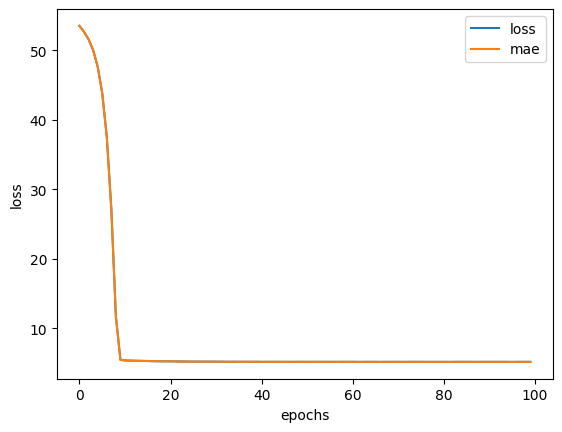

In [ ]:
# Plot loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Using yesterday's data, can we predict tomorrow's High?

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dropped_data.head(2)

,Open,High,Low,Close,Adj Close,Volume,Cumulative Price Volume,Cumulative Volume,VWAP,SMA5,...,SMA20,SMA50,EMA5,EMA10,EMA20,RSI14,EMA50,%K,%D,MACD
49,31.05,32.12,28.57,32.02,30.47,5042700.00,5548640025.52,151965600.00,36.51,32.96,...,36.38,36.81,32.82,34.27,35.68,-120.30,32.02,33.51,14.28,-1.30
50,29.00,30.93,27.78,28.44,27.06,4251600.00,5669541356.76,156217200.00,36.29,31.60,...,35.86,36.66,31.36,33.21,34.99,-82.17,31.88,5.90,13.53,-1.70


In [ ]:
dropped_data_shifted = dropped_data

In [ ]:
dropped_data_shifted.head(5)

,Open,High,Low,Close,Adj Close,Volume,Cumulative Price Volume,Cumulative Volume,VWAP,SMA5,...,SMA20,SMA50,EMA5,EMA10,EMA20,RSI14,EMA50,%K,%D,MACD
49,31.05,32.12,28.57,32.02,30.47,5042700.00,5548640025.52,151965600.00,36.51,32.96,...,36.38,36.81,32.82,34.27,35.68,-120.30,32.02,33.51,14.28,-1.30
50,29.00,30.93,27.78,28.44,27.06,4251600.00,5669541356.76,156217200.00,36.29,31.60,...,35.86,36.66,31.36,33.21,34.99,-82.17,31.88,5.90,13.53,-1.70
51,29.16,31.96,29.00,31.68,30.15,6676200.00,5881021116.04,162893400.00,36.10,30.96,...,35.52,36.57,31.46,32.93,34.68,-177.28,31.87,35.18,24.86,-1.74
52,30.15,31.83,29.72,30.52,29.05,6797400.00,6088500417.03,169690800.00,35.88,30.44,...,35.12,36.46,31.15,32.49,34.28,-201.31,31.82,24.76,21.95,-1.84
53,30.59,30.87,28.51,29.33,27.92,5260500.00,6242808410.34,174951300.00,35.68,30.40,...,34.68,36.34,30.54,31.92,33.81,-220.01,31.72,14.01,24.65,-1.99


In [ ]:
dropped_data_shifted["High"] = dropped_data_shifted["High"].shift(-1)
dropped_data_shifted = dropped_data_shifted.dropna()

<ipython-input-1070-1fb1b232f2e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_data_shifted["High"] = dropped_data_shifted["High"].shift(-1)


In [ ]:
dropped_data_shifted.tail(4)

,Open,High,Low,Close,Adj Close,Volume,Cumulative Price Volume,Cumulative Volume,VWAP,SMA5,...,SMA20,SMA50,EMA5,EMA10,EMA20,RSI14,EMA50,%K,%D,MACD
951,49.72,49.58,49.13,49.32,49.32,2161200.00,125270398174.89,2432711700.00,51.49,49.64,...,49.25,50.57,49.44,49.31,49.51,547.69,50.27,75.78,82.68,-0.37
952,49.53,50.38,49.06,49.37,49.37,1542600.00,125346556335.24,2434254300.00,51.49,49.59,...,49.18,50.57,49.42,49.32,49.50,494.52,50.23,77.33,79.81,-0.34
953,49.75,50.71,49.66,50.30,50.30,2296000.00,125462045133.49,2436550300.00,51.49,49.70,...,49.14,50.59,49.71,49.50,49.57,195.69,50.24,97.71,83.61,-0.24
954,50.30,53.30,49.87,49.93,49.93,3687200.00,125646147030.61,2440237500.00,51.49,49.72,...,49.09,50.59,49.78,49.58,49.61,261.87,50.22,79.63,84.89,-0.18


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
dropped_data_shifted.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Cumulative Price Volume', 'Cumulative Volume', 'VWAP', 'SMA5', 'SMA10',
       'SMA20', 'SMA50', 'EMA5', 'EMA10', 'EMA20', 'RSI14', 'EMA50', '%K',
       '%D', 'MACD'],
      dtype='object')

In [ ]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["Open", "Low", "Close", "Adj Close", "Volume",
                      "Cumulative Price Volume", "Cumulative Volume", "VWAP", "SMA5", "SMA10",
                      "SMA20", "SMA50", "EMA5", "EMA10", "EMA20", "RSI14", "EMA50", "%K",
                      "%D", "MACD"])
)

In [ ]:
# Create X and y
X = dropped_data_shifted.drop("High", axis=1)
y = dropped_data_shifted["High"]

In [ ]:
# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Fit the column transformer to our training data
ct.fit(X_train)

ColumnTransformer(transformers=[('minmaxscaler', MinMaxScaler(),
                                 ['Open', 'Low', 'Close', 'Adj Close', 'Volume',
                                  'Cumulative Price Volume',
                                  'Cumulative Volume', 'VWAP', 'SMA5', 'SMA10',
                                  'SMA20', 'SMA50', 'EMA5', 'EMA10', 'EMA20',
                                  'RSI14', 'EMA50', '%K', '%D', 'MACD'])])

In [ ]:
# Transform training and test data with normalization (MinMaxScaler)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
X_train_normal[0]

array([0.3358845 , 0.3658276 , 0.37107946, 0.36301775, 0.04496262,
       0.06932078, 0.10342254, 0.08246664, 0.31240519, 0.2813536 ,
       0.23929103, 0.14370165, 0.31181218, 0.27756419, 0.22696121,
       0.67566633, 0.20701503, 0.8771621 , 0.88100618, 0.63102341])

Let's go ahead and build a neural network

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
history = model_2.fit(tf.expand_dims(X_train_normal, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
# Evaluate model_2 on normalized data
model_2.evaluate(X_test_normal, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 5.1573 - mae: 5.1573


[5.157252311706543, 5.157252311706543]

In [ ]:
y_test.mean()

53.93186814444406

Text(0.5, 0, 'epochs')

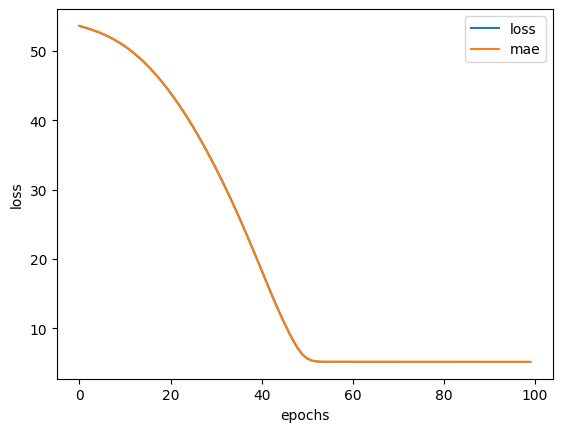

In [ ]:
# Plot loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Using Keras Tuner for model_2

In [ ]:
!pip install -q -U keras-tuner

In [ ]:
from tensorflow import keras
import kerastuner as kt

In [ ]:
# Define a function to build model
def build_model(hp):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(units=hp.Int("units", min_value=32, max_value=512, step=32, default=128), activation="relu"))
  model.add(tf.keras.layers.Dense(1))
  model.compile(loss="mae", optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])), metrics=["mae"])
  return model

In [ ]:
# Instantiate a Keras Tuner, in this case, RandomSearch
tuner = kt.RandomSearch(
    build_model,
    objective="val_mae", # You can use "mae" or another appropriate metric as the objective
    max_trials=5, # Number of trials to run
    directory="/content/Directory", # Directory to save tuning results
    project_name="my_tuner_project" # Name of project
)

Reloading Tuner from /content/Directory/my_tuner_project/tuner0.json


In [ ]:
# Search for the best hyperparameters
tuner.search(tf.expand_dims(X_train_normal, axis=-1), y_train, epochs=100, validation_data=(tf.expand_dims(X_test_normal, axis=-1), y_test), verbose=0)

# Get the best hyperparameters
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

In [ ]:
# Define the model architecture with the best hyperparameters
best_units = best_hyperparameters.get("units")
best_learning_rate = best_hyperparameters.get("learning_rate")

In [ ]:
X_train_normal.shape

(724, 20)

In [ ]:
input_shape = (20,)

In [ ]:
tuned_model = keras.Sequential([
    keras.layers.Dense(units=best_units, activation="relu", input_shape=input_shape),
    keras.layers.Dense(1)
])

tuned_model.compile(optimizer=keras.optimizers.Adam(learning_rate=best_learning_rate),
                    loss="mae",
                    metrics=["mae"])

history = tuned_model.fit(X_train_normal, y_train, epochs=100, verbose=0)

In [ ]:
tuned_model.evaluate(X_test_normal, y_test)

6/6 [==============================] - 0s 4ms/step - loss: 1.3698 - mae: 1.3698


[1.3698495626449585, 1.3698495626449585]

Text(0.5, 0, 'epochs')

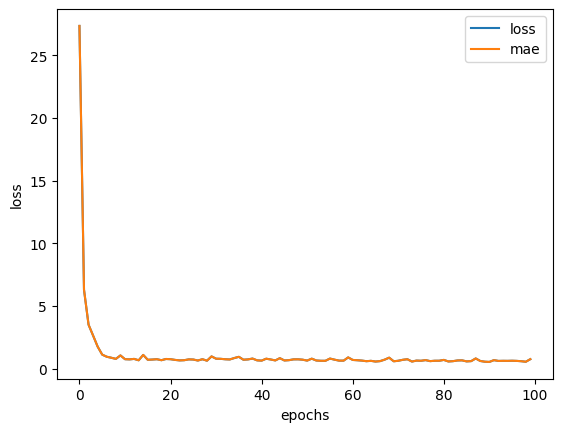

In [ ]:
# Plot loss curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Save the model

In [ ]:
tuned_model.save("tuned_model_v2.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### What to do next

Figure out how to use yesterday's data to predict it

In [ ]:
last_row = dropped_data.iloc[[-1]]

In [ ]:
last_row

,Open,High,Low,Close,Adj Close,Volume,Cumulative Price Volume,Cumulative Volume,VWAP,SMA5,...,SMA20,SMA50,EMA5,EMA10,EMA20,RSI14,EMA50,%K,%D,MACD
955,51.29,NaN,50.87,51.92,51.92,6685653.00,125993266121.00,2446923153.00,51.49,50.17,...,49.16,50.62,50.50,50.00,49.83,186.33,50.29,78.46,85.27,0.02


In [ ]:
last_row.drop("High", axis=1, inplace=True)

<ipython-input-1098-157b88afd5ec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  last_row.drop("High", axis=1, inplace=True)


In [ ]:
last_row.shape

(1, 20)

In [ ]:
tuned_model.predict(last_row)

1/1 [==============================] - 0s 207ms/step


array([[4.2763895e+10]], dtype=float32)